In [12]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
df = pd.read_excel('Eye_Features.xlsx')

In [7]:
df.head()

,Image_Name,Hb Value,Gender,Age,Height,Weight,Mean_Red,Mean_Green,Mean_Blue,Mean_R-G,...,Brightness,Entropy,Mean_L,Mean_A,Mean_B,Mean_G1,Mean_G2,Mean_G3,Mean_G4,Mean_G5
0,1709617490220.jpg,11.5,1,63,150.0,42,131.706589,63.215160,60.592484,63.994053,...,70.704111,0.047401,85.339218,157.576202,145.748566,53.674080,27.372524,7.848403,26.354454,102.570213
1,1709617782204.jpg,11.6,0,63,155.0,55,109.073776,57.617134,54.754238,52.570099,...,63.238866,0.052394,74.141937,152.134354,141.959122,47.000000,25.432749,6.171990,22.339546,81.861877
2,1709618916134.jpg,11.1,1,50,151.0,45,107.769363,60.255825,66.457344,49.842838,...,62.758943,0.031541,74.819908,152.460434,138.383453,66.334137,32.717117,10.256500,33.248707,92.807060
3,1709619661748.jpg,12.1,1,42,155.0,45,113.670876,53.096241,53.484196,56.653030,...,60.908574,0.042513,74.068512,155.240585,142.901154,48.659107,25.505156,7.698782,24.404131,87.301033
4,1709620146694.jpg,12.2,1,76,148.0,60,127.653755,73.177910,69.270592,55.199455,...,79.248177,0.087676,91.756958,153.043442,143.239899,41.057255,22.207729,4.998142,19.600569,102.189751


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Image_Name       404 non-null    object 
 1   Hb Value         404 non-null    float64
 2   Gender           404 non-null    int64  
 3   Age              404 non-null    int64  
 4   Height           404 non-null    float64
 5   Weight           404 non-null    int64  
 6   Mean_Red         404 non-null    float64
 7   Mean_Green       404 non-null    float64
 8   Mean_Blue        404 non-null    float64
 9   Mean_R-G         404 non-null    float64
 10  Erythema_Index   404 non-null    float64
 11  Mean_Hue         404 non-null    float64
 12  Mean_Saturation  404 non-null    float64
 13  Mean_Value       404 non-null    float64
 14  High_Hue_Ratio   404 non-null    float64
 15  Brightness       404 non-null    float64
 16  Entropy          404 non-null    float64
 17  Mean_L          

In [9]:
df.isnull().sum()

Image_Name         0
Hb Value           0
Gender             0
Age                0
Height             0
Weight             0
Mean_Red           0
Mean_Green         0
Mean_Blue          0
Mean_R-G           0
Erythema_Index     0
Mean_Hue           0
Mean_Saturation    0
Mean_Value         0
High_Hue_Ratio     0
Brightness         0
Entropy            0
Mean_L             0
Mean_A             0
Mean_B             0
Mean_G1            0
Mean_G2            0
Mean_G3            0
Mean_G4            0
Mean_G5            0
dtype: int64

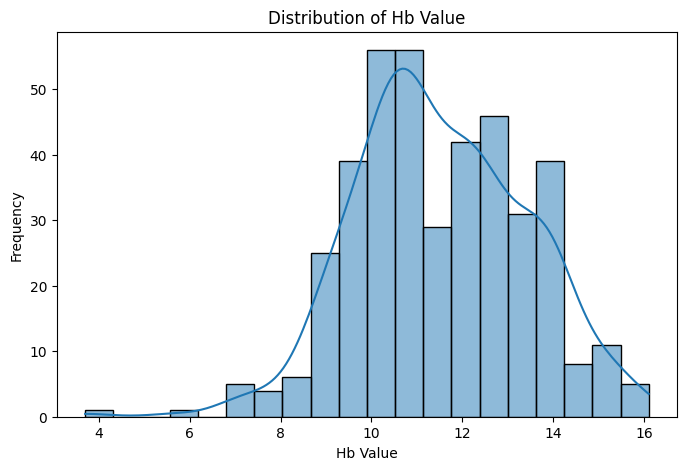

In [13]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Hb Value"], kde=True, bins=20)
plt.title("Distribution of Hb Value")
plt.xlabel("Hb Value")
plt.ylabel("Frequency")
plt.show()

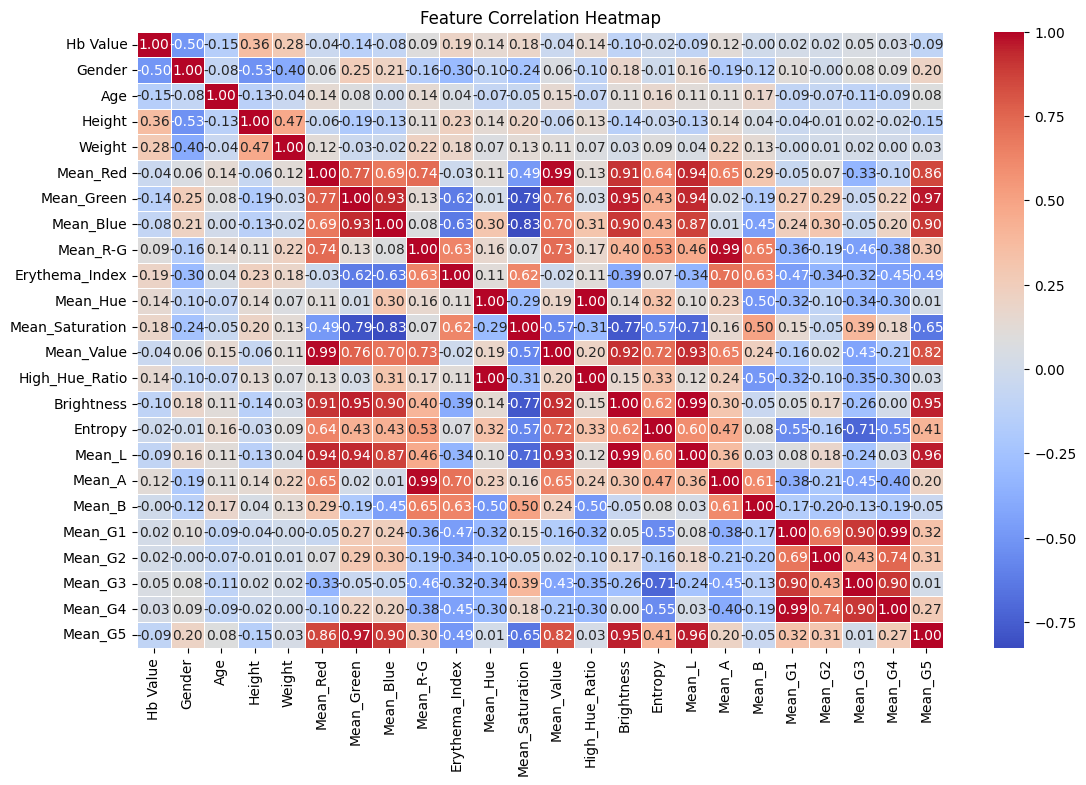

In [15]:
plt.figure(figsize=(13, 8))
sns.heatmap(df.iloc[:, 1:].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


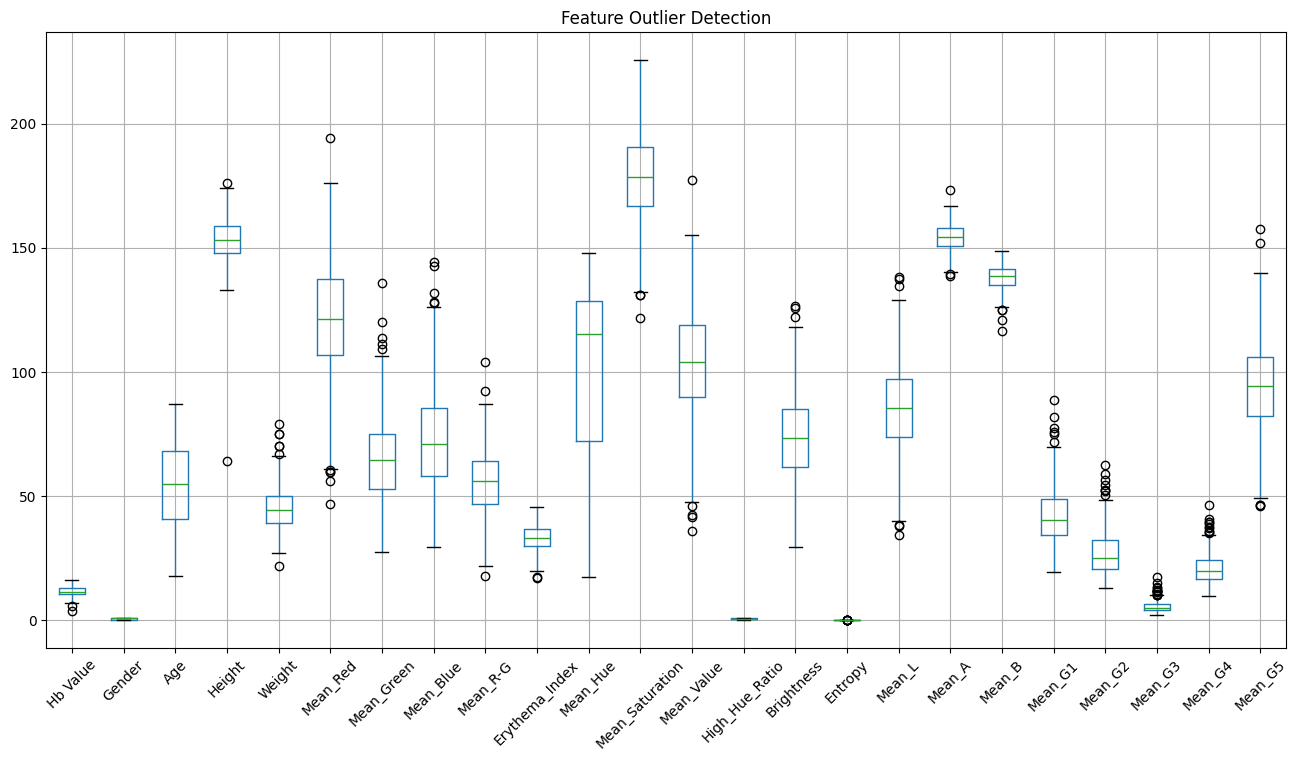

In [18]:
plt.figure(figsize=(16, 8))
df.iloc[:, 1:].boxplot(rot=45)
plt.title("Feature Outlier Detection")
plt.show()


/tmp/ipykernel_47115/2978108418.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Gender", y="Hb Value", data=df, palette="coolwarm")


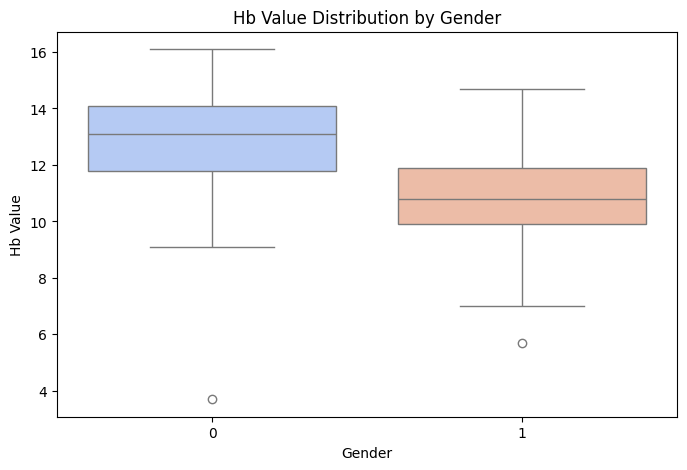

In [20]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Gender", y="Hb Value", data=df, palette="coolwarm")
plt.title("Hb Value Distribution by Gender")
plt.show()

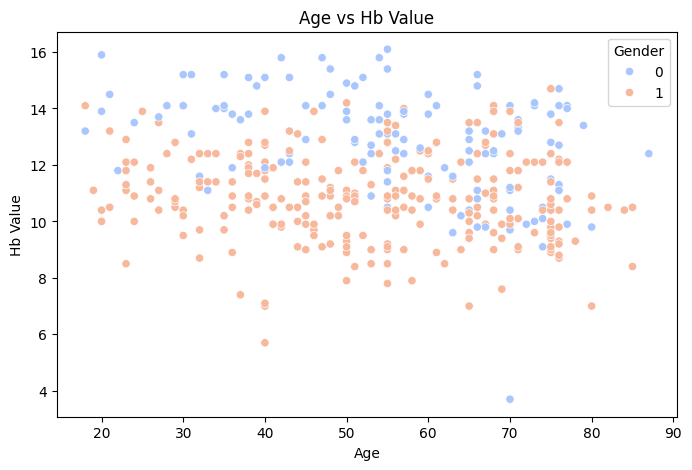

In [21]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Age", y="Hb Value", data=df, hue="Gender", palette="coolwarm")
plt.title("Age vs Hb Value")
plt.show()


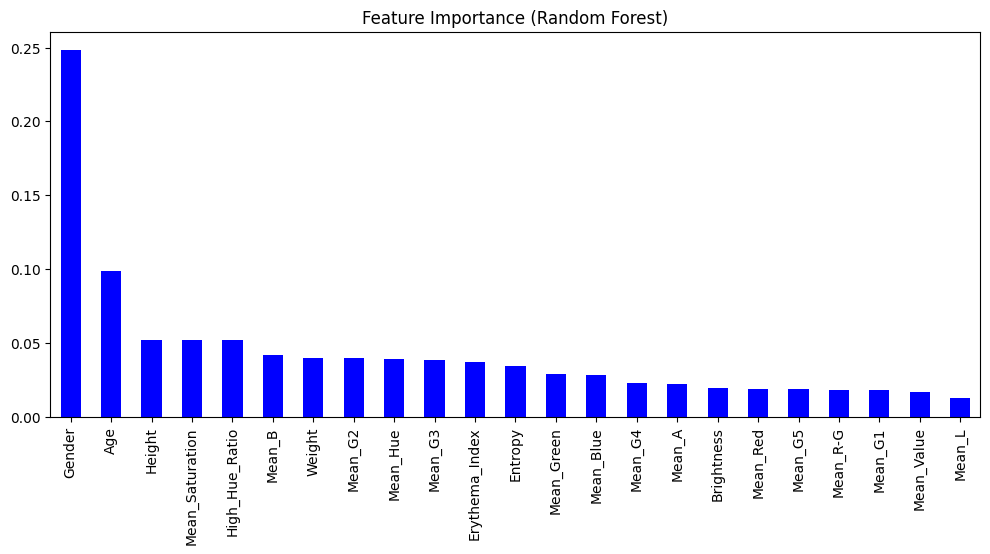

In [22]:
from sklearn.ensemble import RandomForestRegressor

# Define X (features) and Y (target)
X = df.drop(columns=["Image_Name", "Hb Value"])
y = df["Hb Value"]

# Train a basic model
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Feature importance visualization
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind="bar", figsize=(12, 5), color="blue")
plt.title("Feature Importance (Random Forest)")
plt.show()


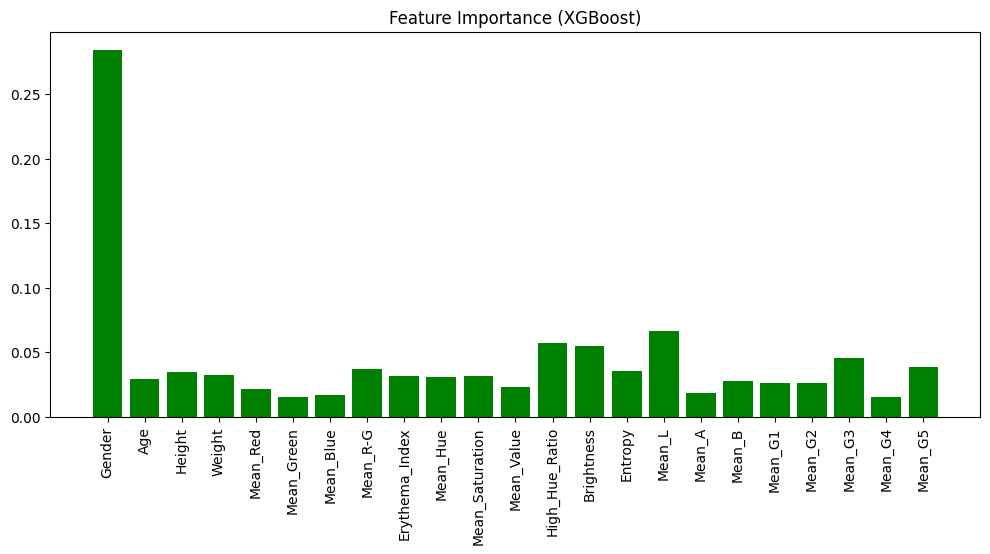

In [23]:
from xgboost import XGBRegressor

# Train XGBoost model
xgb = XGBRegressor()
xgb.fit(X, y)

# Get feature importance
importance = xgb.feature_importances_

# Visualize
plt.figure(figsize=(12, 5))
plt.bar(X.columns, importance, color="green")
plt.xticks(rotation=90)
plt.title("Feature Importance (XGBoost)")
plt.show()


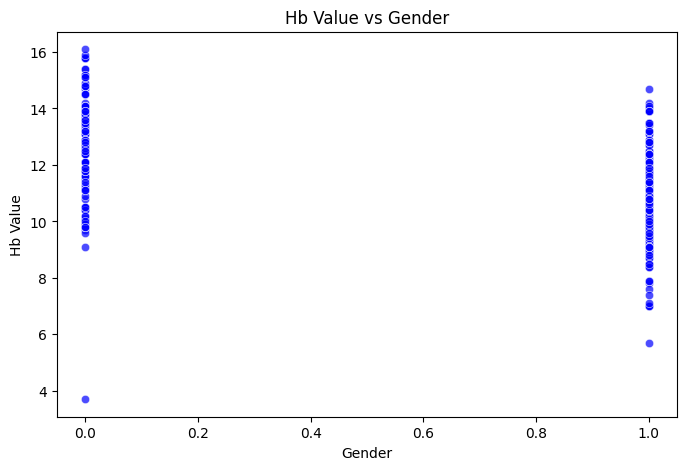

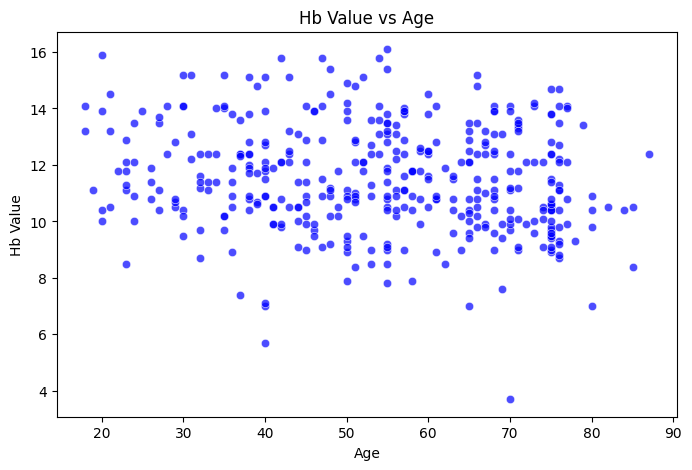

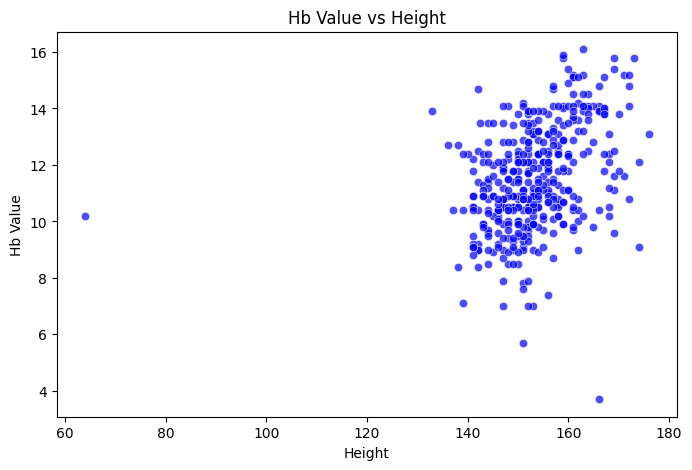

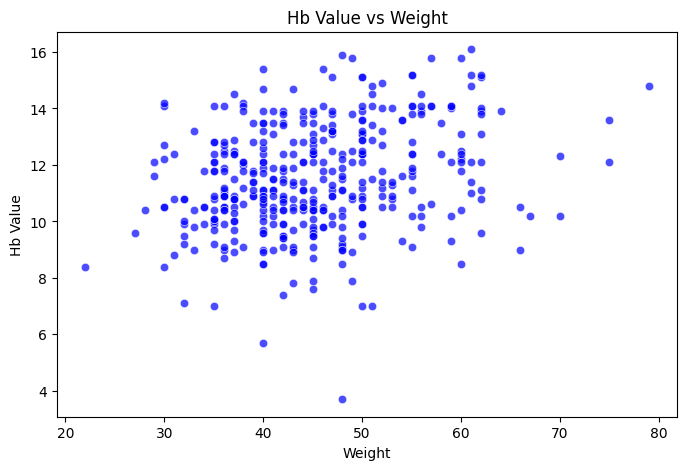

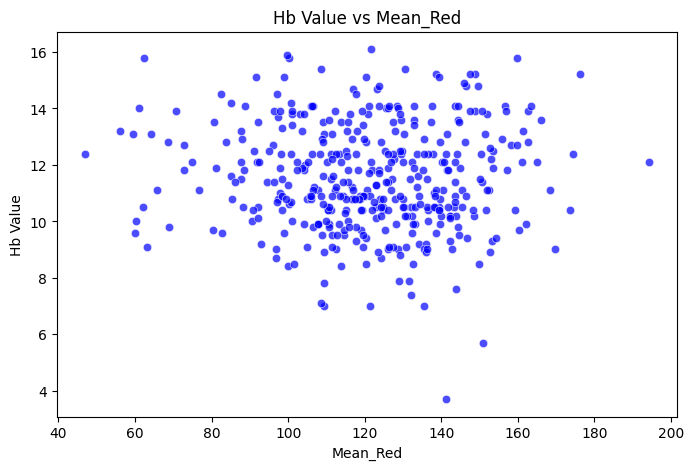

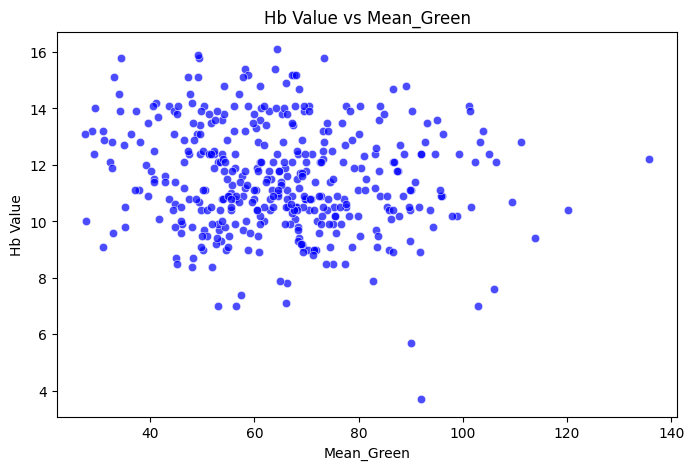

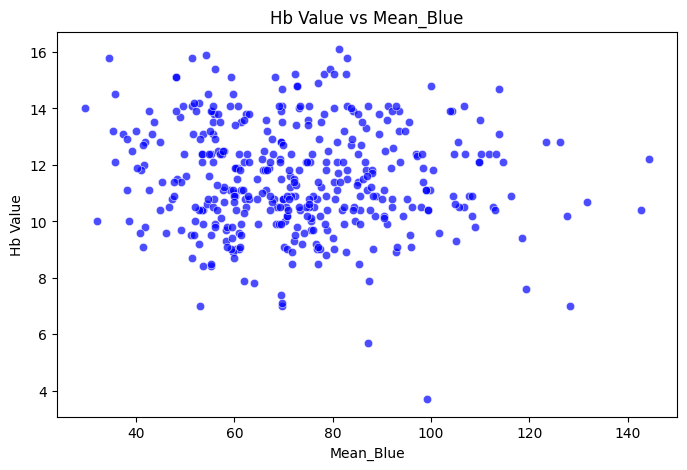

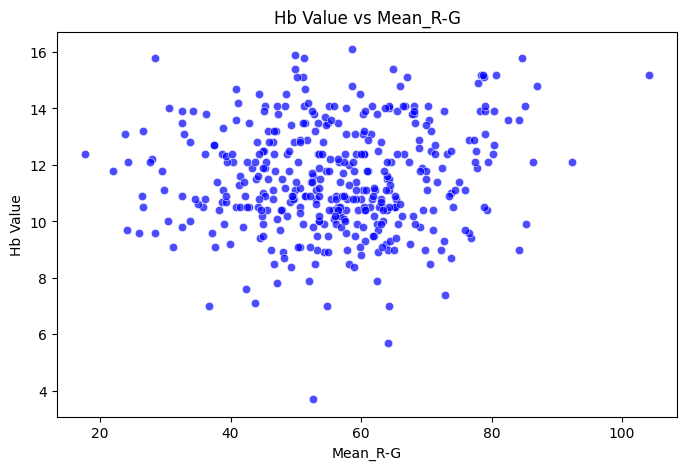

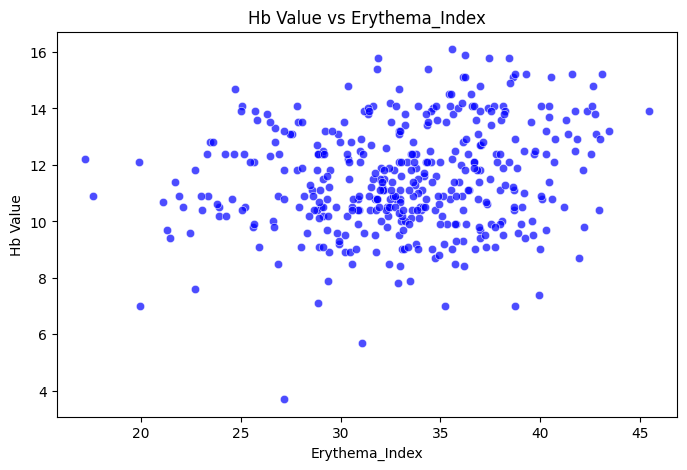

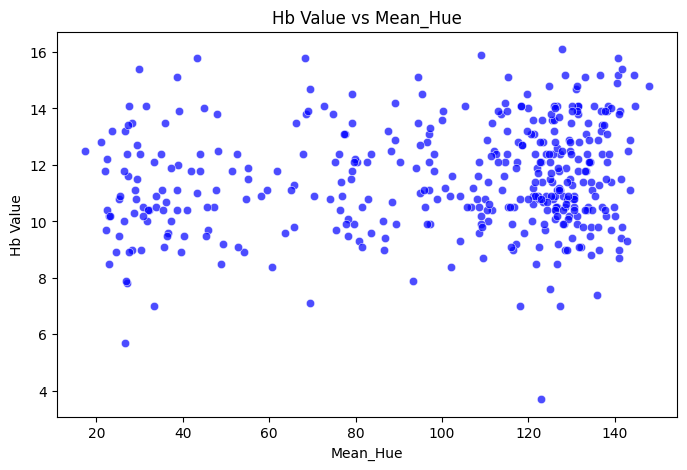

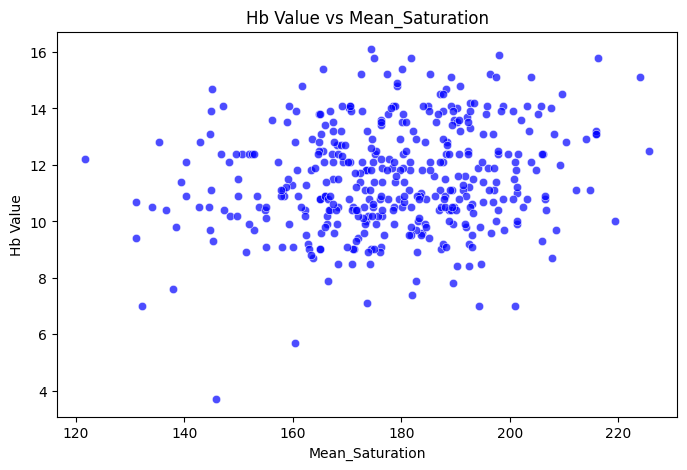

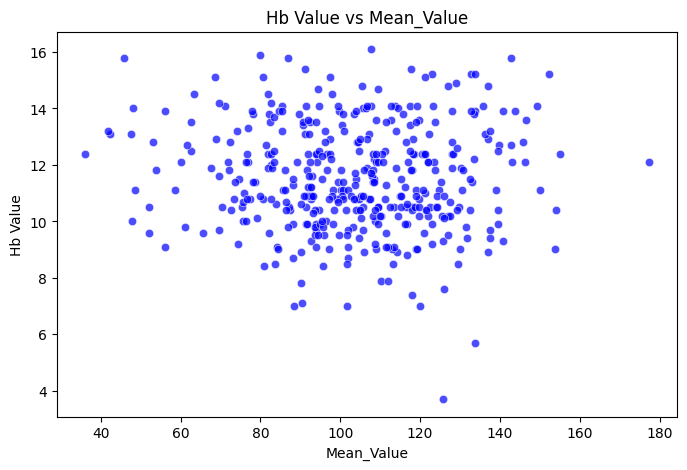

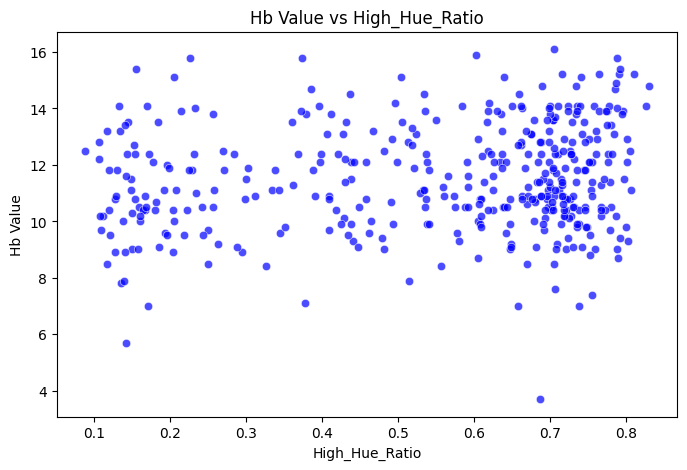

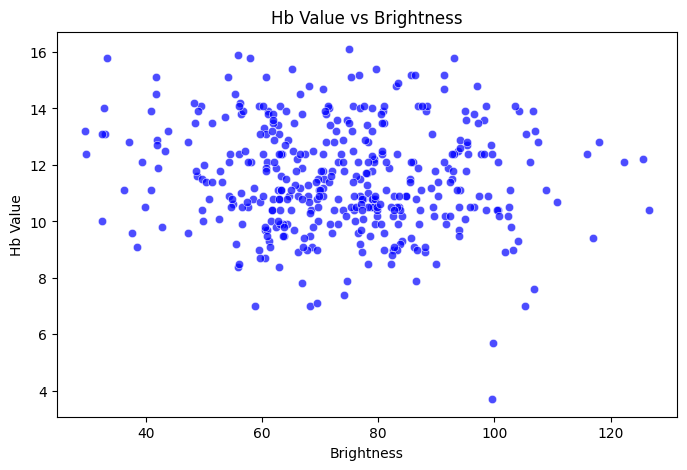

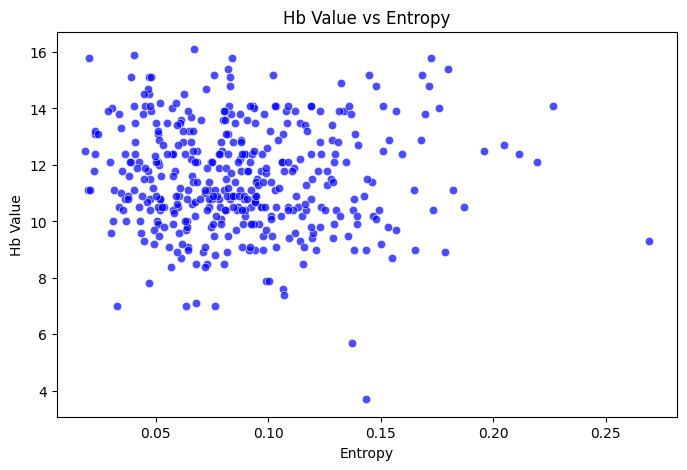

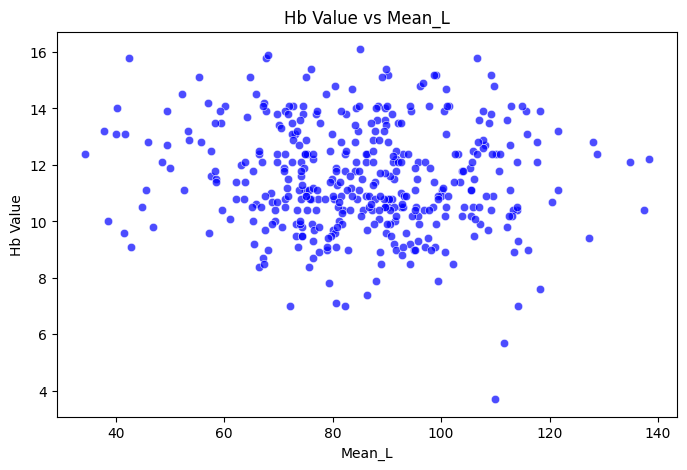

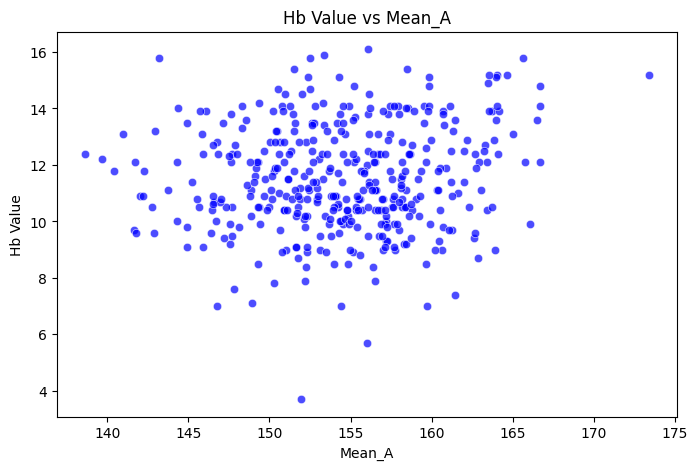

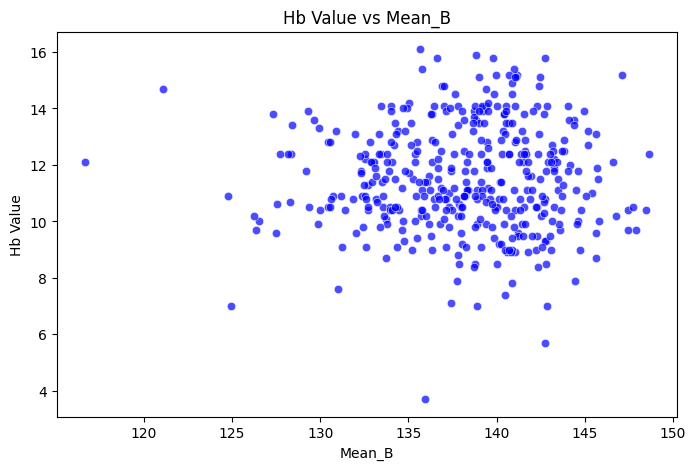

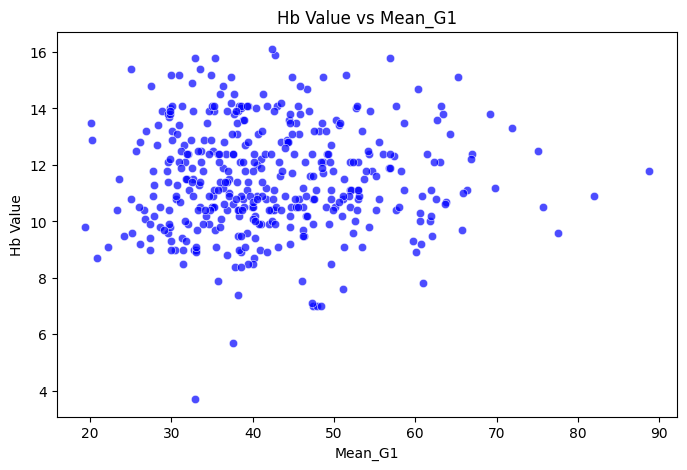

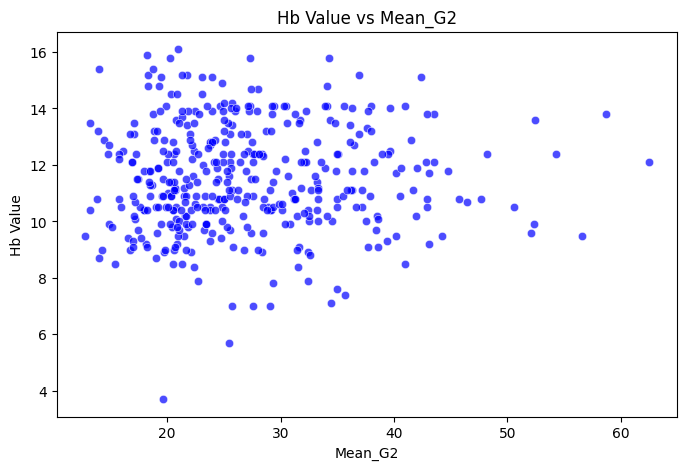

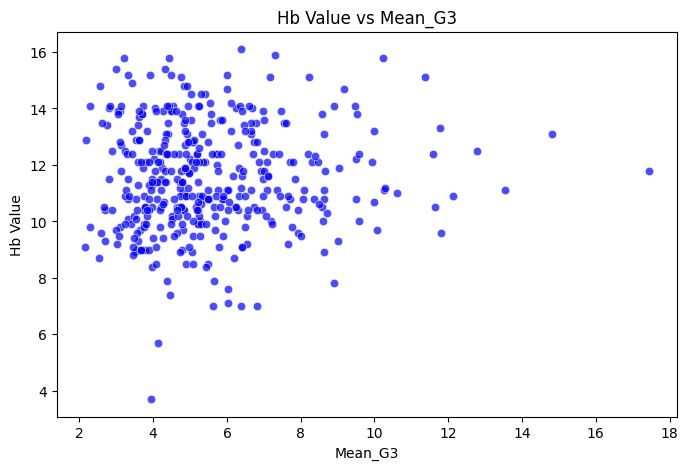

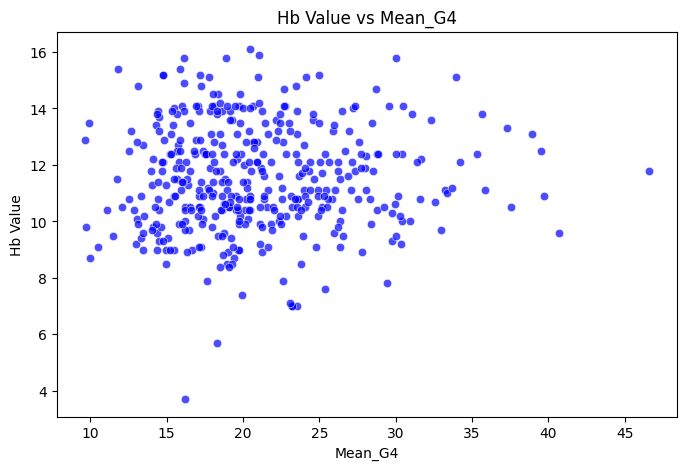

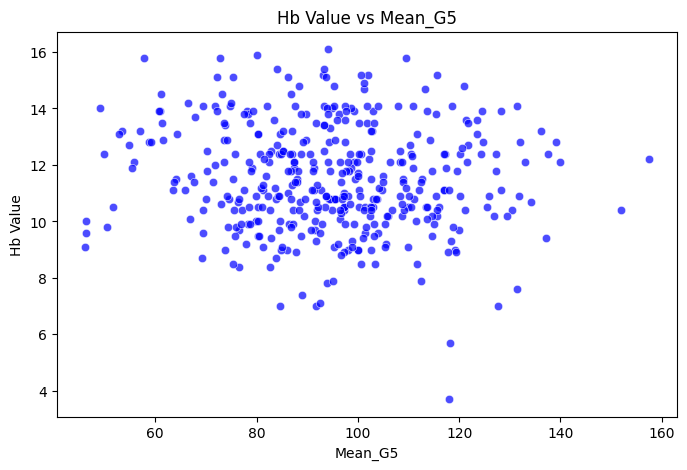

In [29]:
for feature in X:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=df[feature], y=df["Hb Value"], alpha=0.7, color="blue")
    plt.xlabel(feature)
    plt.ylabel("Hb Value")
    plt.title(f"Hb Value vs {feature}")
    plt.show()  # Show each plot individually

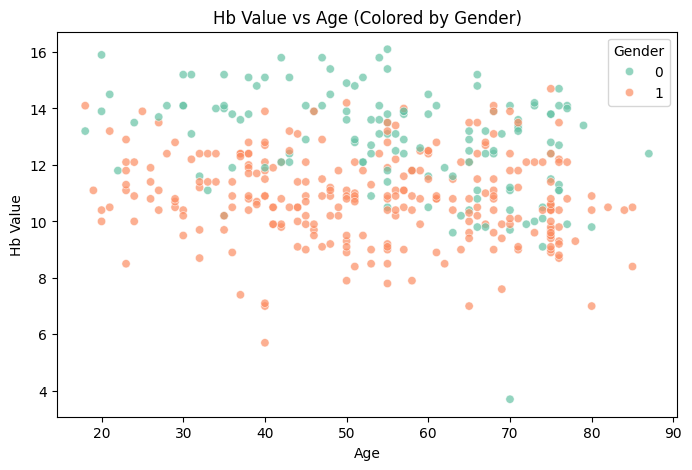

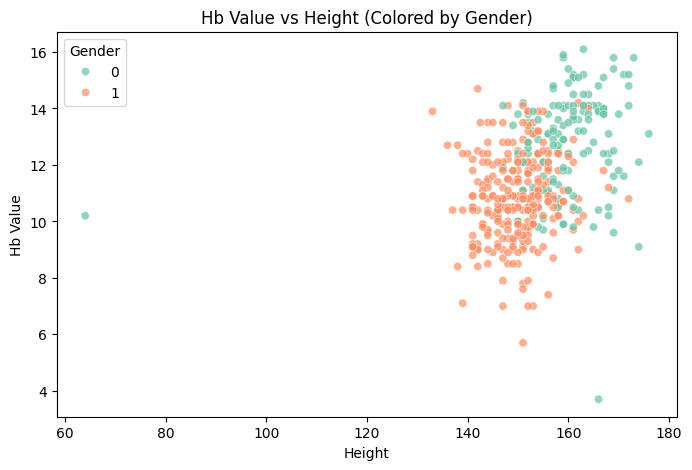

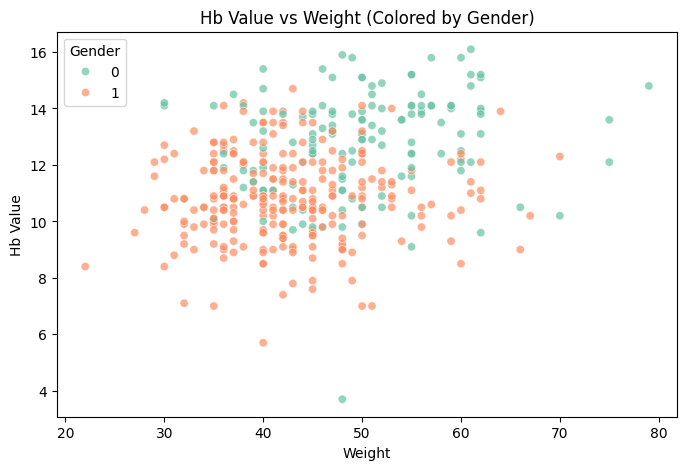

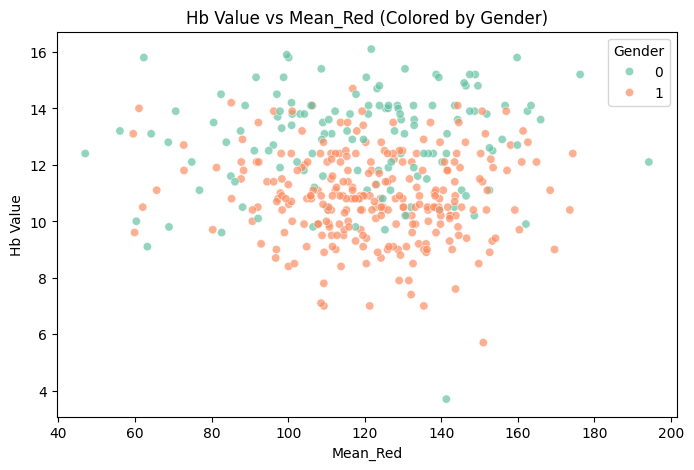

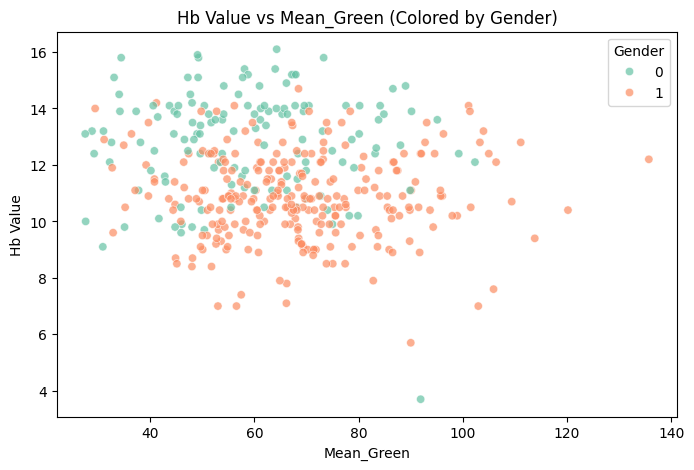

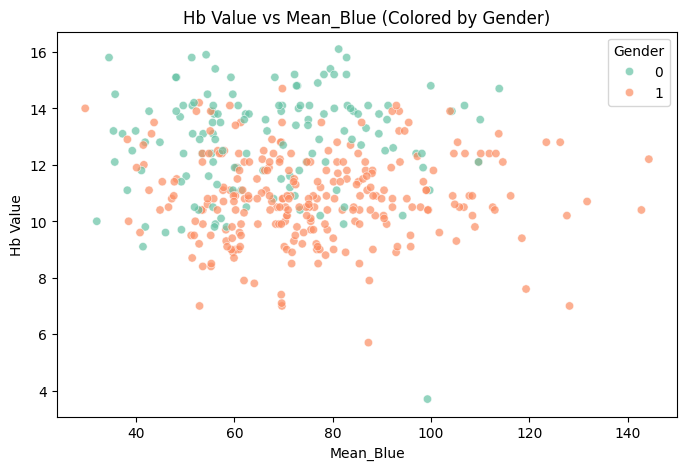

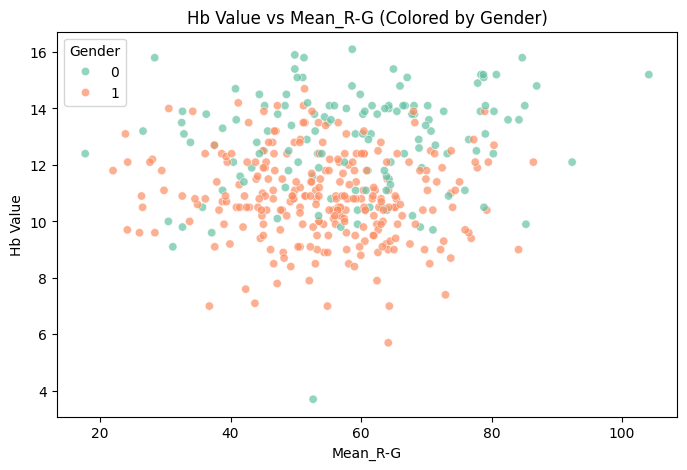

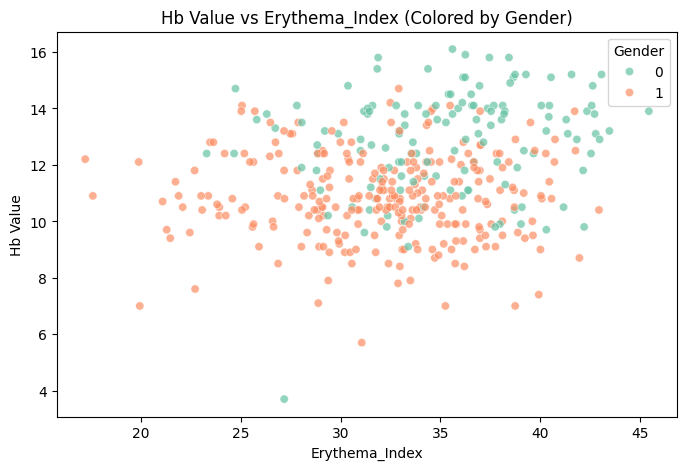

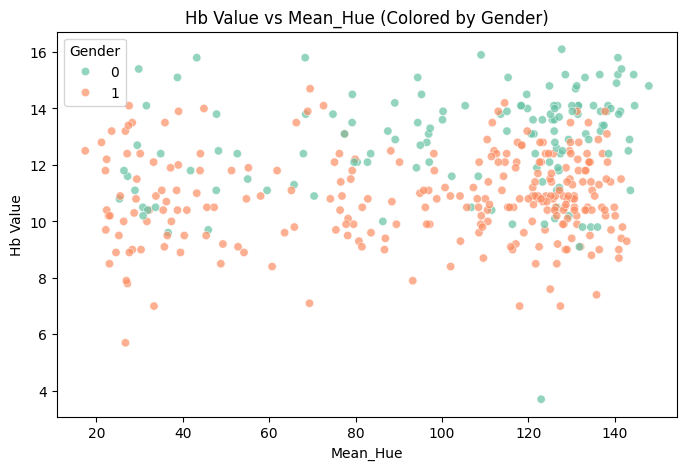

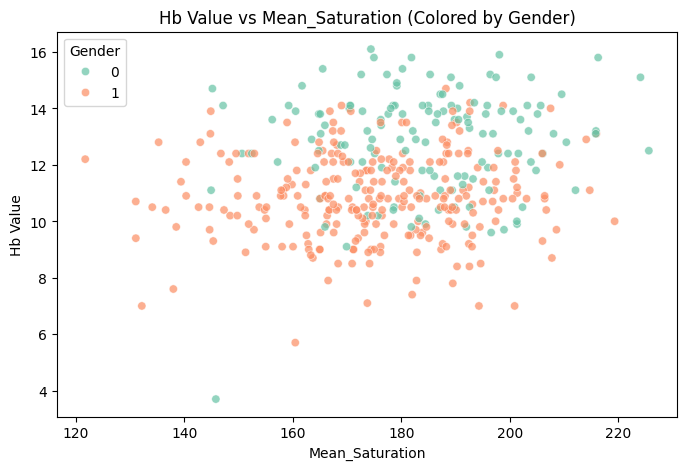

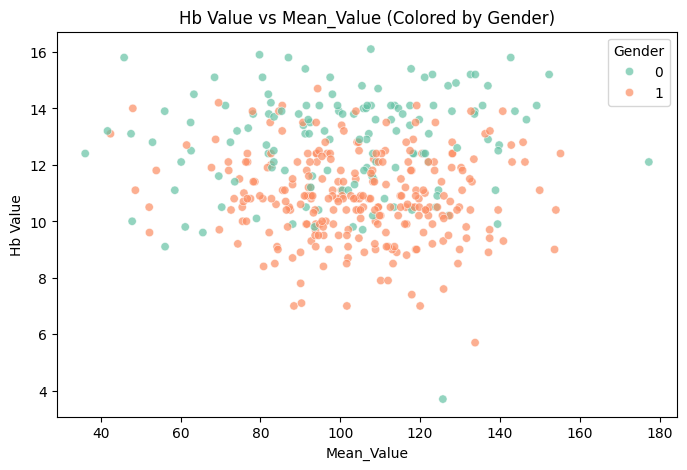

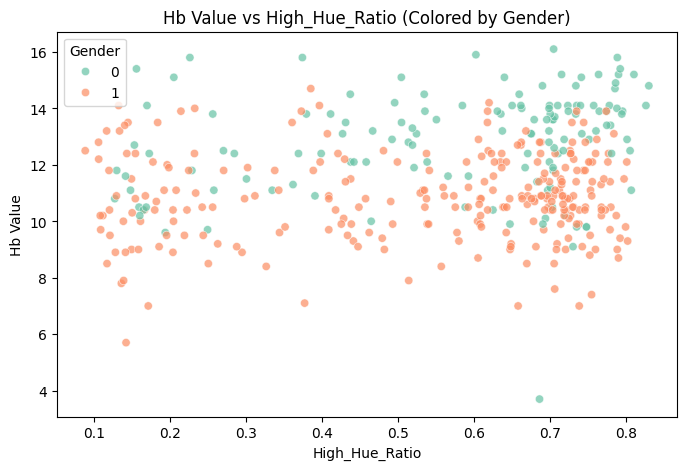

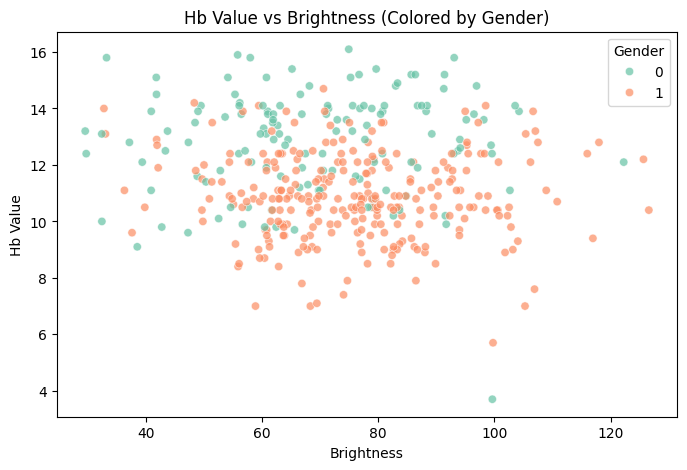

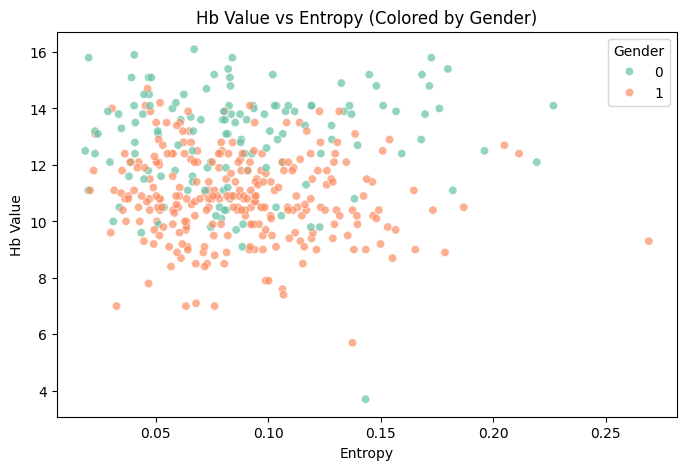

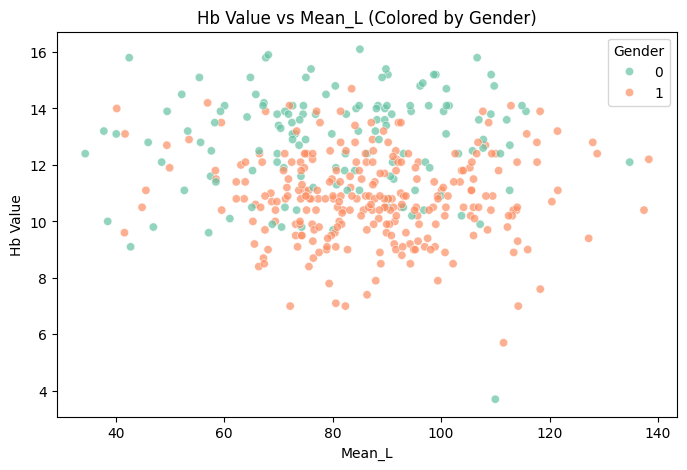

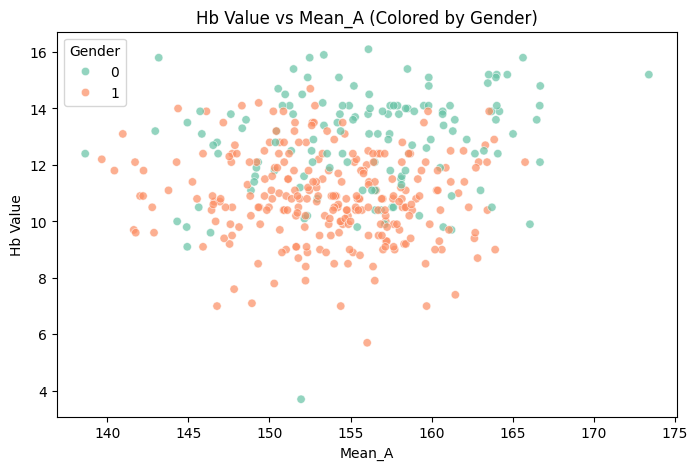

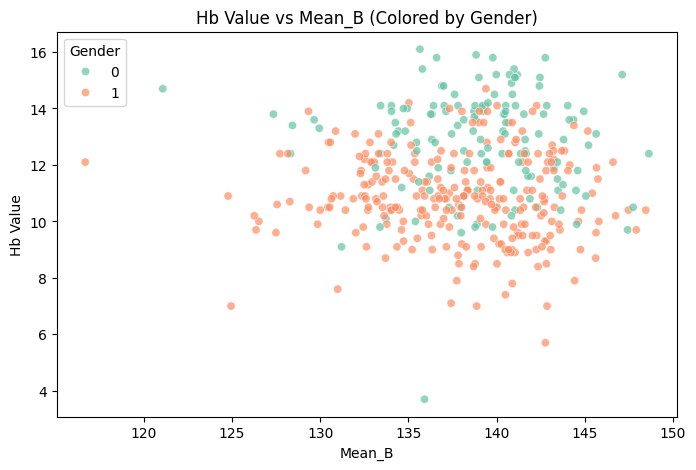

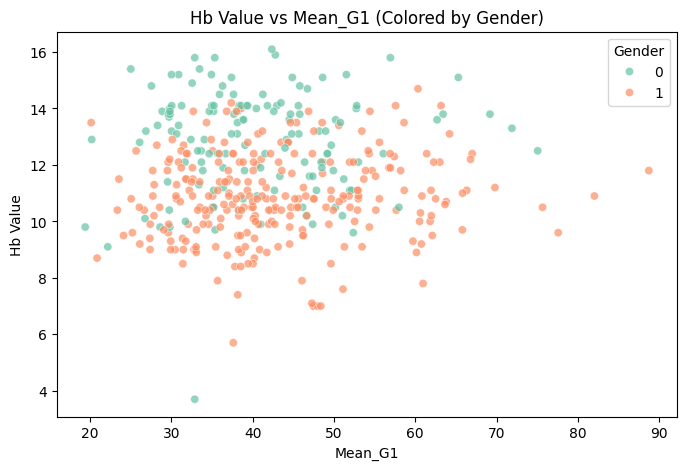

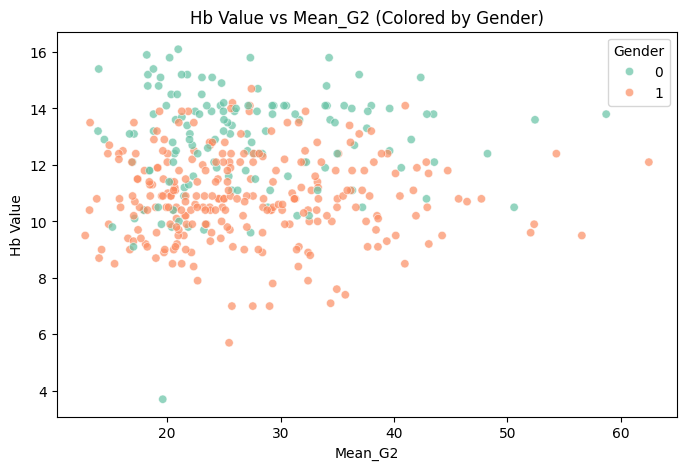

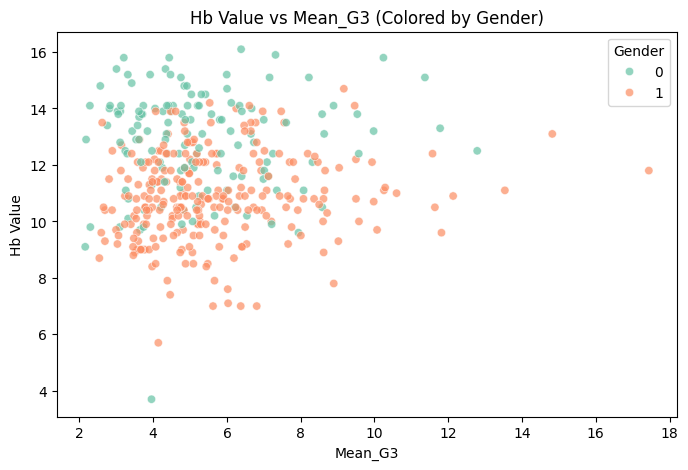

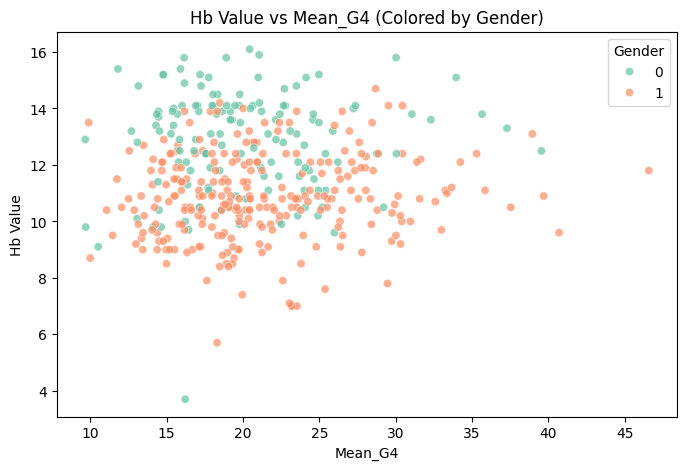

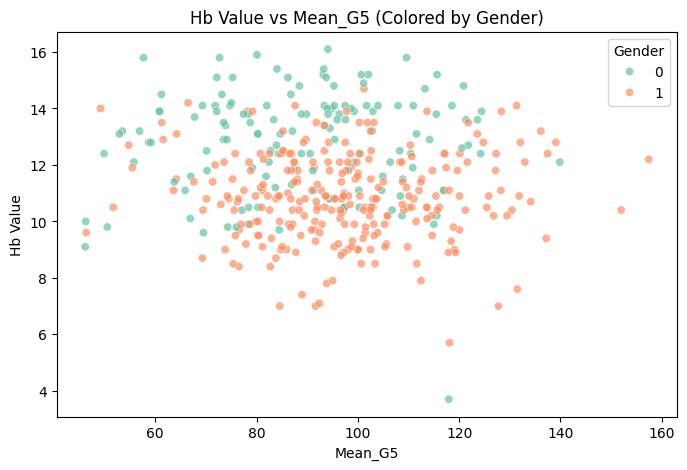

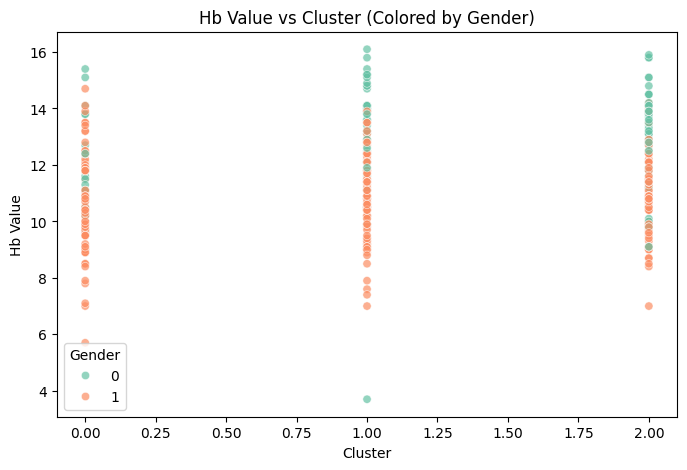

In [34]:
# Drop non-numeric columns
features = df.drop(columns=["Image_Name", "Hb Value", "Gender"]).columns  # Exclude Gender from feature list

# Generate individual plots
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=df[feature], y=df["Hb Value"], hue=df["Gender"], palette="Set2", alpha=0.7)
    plt.xlabel(feature)
    plt.ylabel("Hb Value")
    plt.title(f"Hb Value vs {feature} (Colored by Gender)")
    plt.legend(title="Gender")
    plt.show()  # Show each plot separately